In [1]:
import pandas as pd

# Load the city_attributes data from the provided CSV file
city_attributes_df = pd.read_csv('city_attributes.csv')

# Display the first few rows to verify data is loaded correctly
city_attributes_df.head()


,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208
2,San Francisco,United States,37.774929,-122.419418
3,Seattle,United States,47.606209,-122.332069
4,Los Angeles,United States,34.052231,-118.243683


In [2]:
# Load the humidity data from its CSV file
humidity_df = pd.read_csv('humidity.csv')

# Reshape the humidity data
humidity_df = pd.melt(humidity_df, id_vars=['datetime'], var_name='City', value_name='humidity')

# Display the first few rows to verify reshaping
humidity_df.head()


,datetime,City,humidity
0,2012-10-01 12:00:00,Vancouver,NaN
1,2012-10-01 13:00:00,Vancouver,76.0
2,2012-10-01 14:00:00,Vancouver,76.0
3,2012-10-01 15:00:00,Vancouver,76.0
4,2012-10-01 16:00:00,Vancouver,77.0


In [3]:
merged_humidity_df = pd.merge(humidity_df, city_attributes_df, on='City', how='left')

# Display the first few rows to verify merging
merged_humidity_df.head()


,datetime,City,humidity,Country,Latitude,Longitude
0,2012-10-01 12:00:00,Vancouver,NaN,Canada,49.24966,-123.119339
1,2012-10-01 13:00:00,Vancouver,76.0,Canada,49.24966,-123.119339
2,2012-10-01 14:00:00,Vancouver,76.0,Canada,49.24966,-123.119339
3,2012-10-01 15:00:00,Vancouver,76.0,Canada,49.24966,-123.119339
4,2012-10-01 16:00:00,Vancouver,77.0,Canada,49.24966,-123.119339


In [4]:
pressure_df = pd.read_csv('pressure.csv')
pressure_df = pd.melt(pressure_df, id_vars=['datetime'], var_name='City', value_name='pressure')


In [5]:
temperature_df = pd.read_csv('temperature.csv')
temperature_df = pd.melt(temperature_df, id_vars=['datetime'], var_name='City', value_name='temperature')


In [6]:
weather_description_df = pd.read_csv('weather_description.csv')
weather_description_df = pd.melt(weather_description_df, id_vars=['datetime'], var_name='City', value_name='weather_description')


In [7]:
wind_direction_df = pd.read_csv('wind_direction.csv')
wind_direction_df = pd.melt(wind_direction_df, id_vars=['datetime'], var_name='City', value_name='wind_direction')


In [8]:
wind_speed_df = pd.read_csv('wind_speed.csv')
wind_speed_df = pd.melt(wind_speed_df, id_vars=['datetime'], var_name='City', value_name='wind_speed')


In [9]:
merged_humidity_df = pd.merge(humidity_df, city_attributes_df, on='City', how='left')
merged_pressure_df = pd.merge(pressure_df, city_attributes_df, on='City', how='left')
merged_temperature_df = pd.merge(temperature_df, city_attributes_df, on='City', how='left')
merged_weather_description_df = pd.merge(weather_description_df, city_attributes_df, on='City', how='left')
merged_wind_direction_df = pd.merge(wind_direction_df, city_attributes_df, on='City', how='left')
merged_wind_speed_df = pd.merge(wind_speed_df, city_attributes_df, on='City', how='left')


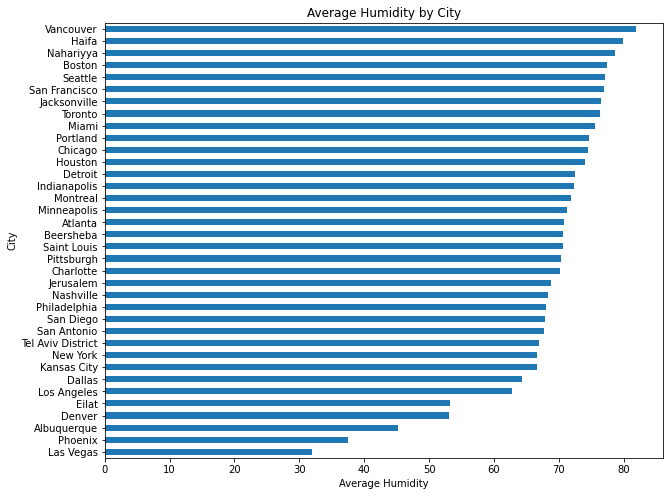

In [10]:
import matplotlib.pyplot as plt

average_humidity = merged_humidity_df.groupby('City')['humidity'].mean().sort_values()
average_humidity.plot(kind='barh', figsize=(10, 8))
plt.title('Average Humidity by City')
plt.xlabel('Average Humidity')
plt.ylabel('City')
plt.show()


1. Which city has the highest average temperature?
To answer this, we'll compute the average temperature for each city using the merged_temperature_df and then identify the city with the highest average.

In [30]:
avg_temperatures = merged_all_data.groupby('City')['temperature'].mean()
city_highest_temp = avg_temperatures.idxmax()
print(f"The city with the highest average temperature is {city_highest_temp}.")


The city with the highest average temperature is Miami.


2. How does the pressure vary throughout the year for a specific city?
For this, we can take a city, say "New York", as an example. We'll plot the pressure throughout the year for this city.

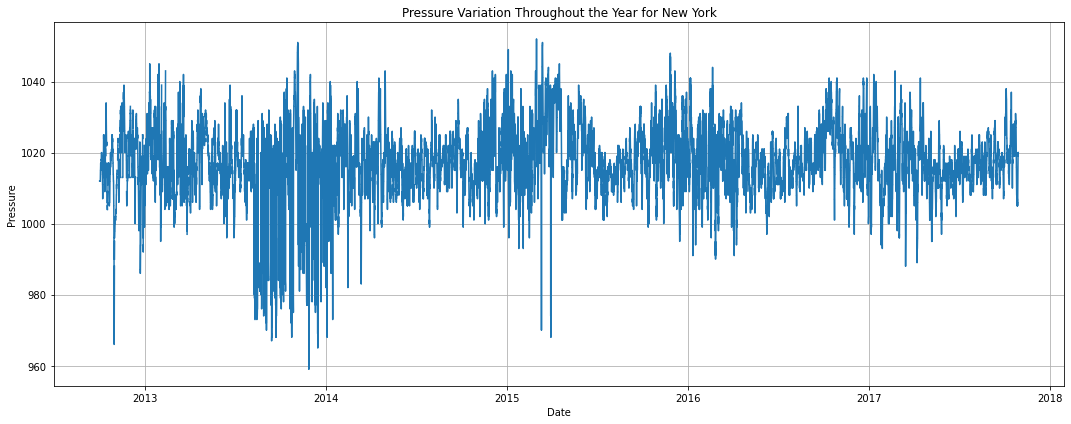

In [13]:
import matplotlib.pyplot as plt

# Filter data for New York
ny_pressure = merged_pressure_df[merged_pressure_df['City'] == 'New York']

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(pd.to_datetime(ny_pressure['datetime']), ny_pressure['pressure'])
plt.title('Pressure Variation Throughout the Year for New York')
plt.xlabel('Date')
plt.ylabel('Pressure')
plt.grid(True)
plt.tight_layout()
plt.show()


3. Is there a correlation between humidity and temperature?
To check the correlation, we'll compute the correlation coefficient between humidity and temperature for each data point across all cities.

In [14]:
merged_humidity_temperature = pd.merge(merged_humidity_df, merged_temperature_df, on=['City', 'datetime'], how='inner')
correlation = merged_humidity_temperature['humidity'].corr(merged_humidity_temperature['temperature'])


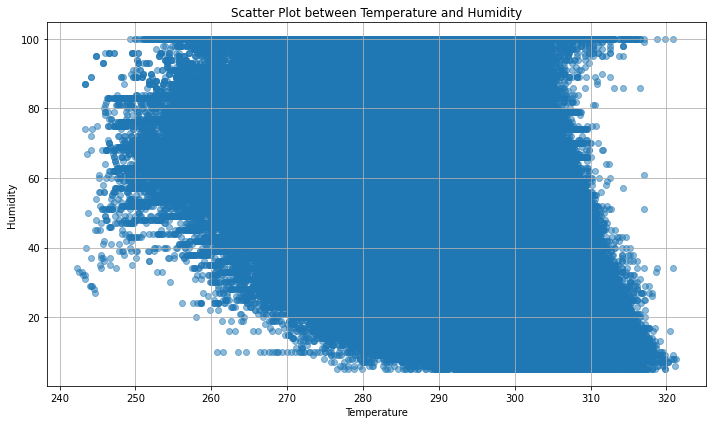

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_humidity_temperature['temperature'], merged_humidity_temperature['humidity'], alpha=0.5)
plt.title('Scatter Plot between Temperature and Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.grid(True)
plt.tight_layout()
plt.show()


1. Seasonal Variations:
To analyze seasonal variations, you can group the data by months or seasons and then compute the mean (or any other metric of interest) for each group.

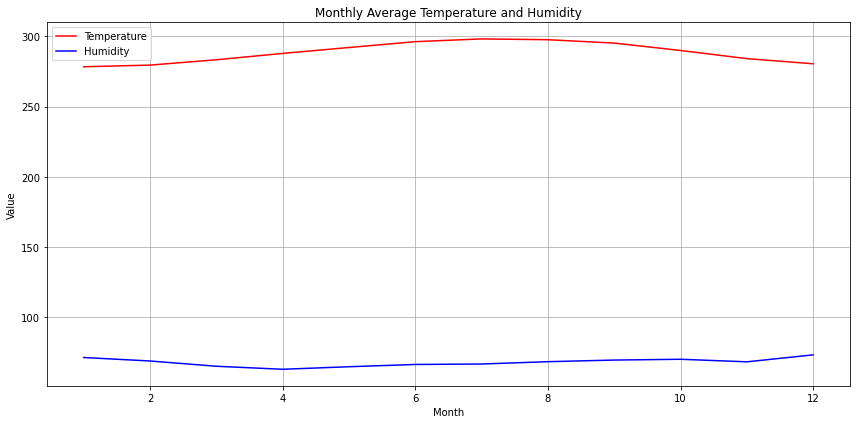

In [16]:
# Extract month from datetime
merged_humidity_temperature['month'] = pd.to_datetime(merged_humidity_temperature['datetime']).dt.month

# Compute the average temperature and humidity for each month
monthly_avg = merged_humidity_temperature.groupby('month')[['temperature', 'humidity']].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg['month'], monthly_avg['temperature'], label='Temperature', color='red')
plt.plot(monthly_avg['month'], monthly_avg['humidity'], label='Humidity', color='blue')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Monthly Average Temperature and Humidity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2. Impact of Weather Patterns:
To assess how weather patterns like rain or snow affect temperature and humidity, you can use the weather_description data.

In [26]:
# Load the data

df_weather_description = pd.read_csv(r'C:\Users\SAHITHYAMOGILI\Desktop\A\weather_description.csv')


# Reshape the data
df_weather_description_melted = df_weather_description.melt(id_vars=['datetime'], var_name='City', value_name='weather_description')

# Merge this reshaped data with the merged_humidity_temperature dataframe
merged_all_data = pd.merge(merged_humidity_temperature, df_weather_description_melted, on=['datetime', 'City'])

print(merged_all_data.columns)


Index(['datetime', 'City', 'humidity', 'Country_x', 'Latitude_x',
       'Longitude_x', 'temperature', 'Country_y', 'Latitude_y', 'Longitude_y',
       'month', 'weather_description'],
      dtype='object')


In [31]:
# Filter data for days with rain
rainy_days = merged_all_data[merged_all_data['weather_description'].str.contains('rain', case=False, na=False)]

# Compute average temperature and humidity on rainy days
avg_rainy = rainy_days[['temperature', 'humidity']].mean()
print(avg_rainy)


temperature    288.072684
humidity        81.964626
dtype: float64


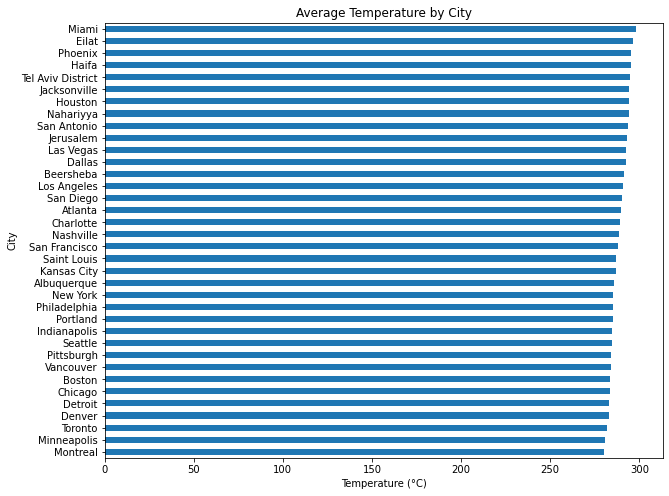

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_temperatures = merged_all_data.groupby('City')['temperature'].mean().sort_values()
avg_temperatures.plot(kind='barh', figsize=(10, 8))
plt.title("Average Temperature by City")
plt.xlabel("Temperature (°C)")
plt.ylabel("City")
plt.show()


C:\Users\SAHITHYAMOGILI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


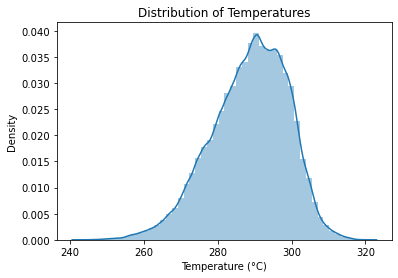

In [33]:
sns.distplot(merged_all_data['temperature'], bins=50, kde=True)
plt.title("Distribution of Temperatures")
plt.xlabel("Temperature (°C)")
plt.ylabel("Density")
plt.show()


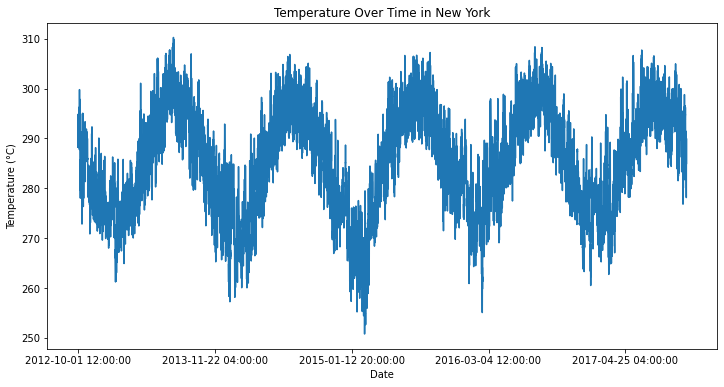

In [34]:
ny_data = merged_all_data[merged_all_data['City'] == 'New York']
ny_data.set_index('datetime')['temperature'].plot(figsize=(12, 6))
plt.title("Temperature Over Time in New York")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()


In [35]:
# Highest and Lowest Average Temperature Cities:
highest_temp_city = merged_all_data.groupby('City')['temperature'].mean().idxmax()
lowest_temp_city = merged_all_data.groupby('City')['temperature'].mean().idxmin()

# (Do similar computations for humidity, pressure, and wind speed)


In [38]:
jupyter nbconvert --to html YourNotebookName.ipynb


SyntaxError: invalid syntax (563069889.py, line 1)